# Общая информация
__Цель:__ сравнить качество генерируемых ответов на всех вопросах и вопросах, относящихся к одной категории

__Задачи:__

1. Сравнить метрики для модели, настроенной на всех вопросах в перемешку и на модели, настроенных на категории API USAGE

In [1]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns


warnings.filterwarnings("ignore")


warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

In [2]:
def add_answers_length(df):
    df['len_of_generated_answer'] = df.generated_answer.apply(lambda x: len(x.split(" ")))
    
    df['len_of_original_answer'] = df.original_answer.apply(lambda x: len(x.split(" ")))
    
    return df

In [3]:
def get_metrics(df, df_diff, df1_name, df2_name, print_1=True, print_2=True):
    bert_f1 = df.bert_f1.mean()
    rouge_score = df.rouge_score.mean()
    bleu_score = df.bleu_score.mean()

    t_bert_f1 = df_diff.bert_f1.mean()
    t_rouge_score = df_diff.rouge_score.mean()
    t_bleu_score = df_diff.bleu_score.mean()

    if print_1:
        print(
            f"BERT score {df1_name}: {round(bert_f1, 5)}",
            f"ROUGE score {df1_name}: {round(rouge_score, 5)}",
            f"Unigram BLEU score {df1_name}: {round(bleu_score, 5)}",
            sep="\n",
        )

        print()

    if print_2:

        print(
            f"BERT score {df2_name}: {round(t_bert_f1, 5)}",
            f"ROUGE score {df2_name}: {round(t_rouge_score, 5)}",
            f"Unigram BLEU score {df2_name}: {round(t_bleu_score, 5)}",
            sep="\n",
        )

        print()

    print(
        f"BERT score diff: {t_bert_f1 - bert_f1} ({round((t_bert_f1 - bert_f1)/bert_f1*100, 2)} %)",
        f"ROUGE score diff: {t_rouge_score - rouge_score} ({round((t_rouge_score - rouge_score)/rouge_score*100, 2)} %)",
        f"Unigram BLEU score diff: {t_bleu_score - bleu_score} ({round((t_bleu_score - bleu_score)/bleu_score*100, 2)} %)",
        sep="\n",
    )

    return {
        df1_name: {
            "bert": bert_f1,
            "rouge": rouge_score,
            "bleu": bleu_score,
        },
        df2_name: {
            "bert": t_bert_f1,
            "rouge": t_rouge_score,
            "bleu": t_bleu_score,
        },
    }

# Фиксация сидов

In [4]:
#torch.manual_seed(42)
np.random.seed(42)

## Загрузка таблиц

In [5]:
data_dir = r"D:\vkr\Notebooks\Analys\artifacts\android_cat_no_cat_comparission/"

In [6]:
best_model_eval_table = pd.read_csv(data_dir+'tuned_model_on_android_200_api_usage_best_by_eval_res.csv')
last_chp_model_eval_table = pd.read_csv(data_dir+'tuned_model_on_android_200_api_usage_last_chp.csv')
no_cat_eval_table = pd.read_csv(data_dir+'tuned_model_on_android_200.csv')

# Анализ результатов

## Изучение семплов

In [7]:
import random

In [8]:
random_idx = random.randrange(0, len(best_model_eval_table))

In [9]:
pd.DataFrame(best_model_eval_table.iloc[random_idx])

,90
title,layout on android studio preview doesn't look the same when running the app on the phone
question,"im developing an android app on android studio, when i run my app the layout looks a bit different from the preview as well as on other phones,for example: the buttons are in different order from right to left instead from left to right or other changes similar to this.as well as on some phones the layout doesn't fit perfectly on the screen for example: the buttons on the sides of the screen appear to be cut out.how can i fix it so the app will look the same with every phone and not only some of them?"
generated_answer,"You can't fix this, it's a design flaw. The layout is designed to work on all devices, not just some. If you want to fix the problem, you'll have to make your own layout for each device."
original_answer,"About the Right-to-left/ Left-to-right, you can choose the globe icon in the preview options bar frame and then choose Preview Right-to-Left Layout option. This will ""fix"" the buttons order in preview."
bert_precision,0.866495
bert_recall,0.836273
bert_f1,0.851116
rouge_score,0.155844
bleu_score,0.139785


In [10]:
pd.DataFrame(last_chp_model_eval_table.iloc[random_idx])

,90
title,layout on android studio preview doesn't look the same when running the app on the phone
question,"im developing an android app on android studio, when i run my app the layout looks a bit different from the preview as well as on other phones,for example: the buttons are in different order from right to left instead from left to right or other changes similar to this.as well as on some phones the layout doesn't fit perfectly on the screen for example: the buttons on the sides of the screen appear to be cut out.how can i fix it so the app will look the same with every phone and not only some of them?"
generated_answer,"I think you should try to use the android:layout_gravity attribute in your layout xml file. This attribute will tell the system that the view should be laid out in a certain way. If you use this attribute, the size of your buttons will be calculated based on this value."
original_answer,"About the Right-to-left/ Left-to-right, you can choose the globe icon in the preview options bar frame and then choose Preview Right-to-Left Layout option. This will ""fix"" the buttons order in preview."
bert_precision,0.866022
bert_recall,0.850993
bert_f1,0.858442
rouge_score,0.181818
bleu_score,0.092593


In [11]:
pd.DataFrame(no_cat_eval_table.iloc[random_idx])

,90
title,"Android, Open Front and Back Cameras Simultaneously"
question,"I am attempting to use 2 Surface Holder objects tied to 2 separate SurfaceViews.I am for the one set doing a Camera.Open0 for the back camera and Camera.Open1 for the front.I am able to get a perfect preview for whichever I call to open first, but am unable to open both Cameras at the same time, even though I am using separate SurfaceViews and SurfaceHolders for each Camera.Is it just impossible to do this under Android ? I have seen a couple of post suggesting that it is either not possible, or that it is phone hardware dependent, but no concrete explanations as to why.Could somebody explain why Android does not appear to support this ? If it is supported, could someone suggest the correct way of opening both Cameras at the same time ?I have also seen some suggestions that it should be possible to do using OpenCV. If so, could someone please provide a link to an example or similar ? Thanks and Regards,Steed."
generated_answer,"not sure if this is possible with Android, however, I've been able do it with a SurfaceHolder and a surfaceview. I'm using the Surfaceview to display the camera preview, and the surfaceholder to show the preview of the other camera."
original_answer,"It is possible because I've done it on my Nexus 6, even recording video from both cameras simultaneously when using Camera1 APIs. However, it is very much limited to a few devices.Any unsupported device should give an error during the 2nd Camera.open call. It seems each hardware manufacturer provides a different implementation of the Camera APIs. You could pretty easily try/catch the exception if a camera does not allow it."
bert_precision,0.863224
bert_recall,0.849406
bert_f1,0.856259
rouge_score,0.206897
bleu_score,0.12069


## Анализ длины текстовых данных

### Анализ длины текстовых данных

In [12]:
best_model_eval_table = add_answers_length(best_model_eval_table)
last_chp_model_eval_table = add_answers_length(last_chp_model_eval_table)
no_cat_eval_table = add_answers_length(no_cat_eval_table)

In [13]:
best_model_eval_table.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.871082,0.837849,0.853953,0.140009,0.188240,26.822430,73.177570
std,0.015655,0.024947,0.016805,0.062396,0.080270,12.715919,69.651127
min,0.830856,0.786797,0.819945,0.037037,0.073248,7.000000,3.000000
25%,0.859667,0.821225,0.840840,0.100505,0.134773,17.000000,30.000000
50%,0.868962,0.833377,0.852783,0.136170,0.168317,24.000000,54.000000
75%,0.882196,0.852825,0.863304,0.179167,0.227553,36.000000,90.500000
max,0.911748,0.899035,0.901864,0.482759,0.500000,66.000000,409.000000


In [14]:
last_chp_model_eval_table.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.871339,0.838195,0.854277,0.132712,0.201891,24.504673,73.177570
std,0.018921,0.025407,0.019124,0.057520,0.077955,12.700003,69.651127
min,0.825292,0.786197,0.817079,0.000000,0.064935,6.000000,3.000000
25%,0.859155,0.823654,0.841027,0.094118,0.147145,15.000000,30.000000
50%,0.870682,0.836721,0.852624,0.126984,0.185185,23.000000,54.000000
75%,0.882831,0.855463,0.869526,0.170927,0.248762,30.000000,90.500000
max,0.912568,0.892915,0.892644,0.324324,0.431818,79.000000,409.000000


In [15]:
no_cat_eval_table.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,0.868632,0.836641,0.852092,0.136761,0.186055,28.950076,71.885023
std,0.020593,0.026860,0.019472,0.059701,0.080331,19.777603,67.709129
min,0.778927,0.711580,0.776376,0.000000,0.024963,4.000000,2.000000
25%,0.857909,0.819919,0.839413,0.099291,0.129534,17.000000,30.000000
50%,0.870044,0.836464,0.852604,0.130841,0.168831,25.000000,51.000000
75%,0.882165,0.853650,0.864075,0.168675,0.234043,35.000000,89.000000
max,0.919771,0.924250,0.910791,0.400000,0.500000,243.000000,580.000000


#### Boxplot длин текстовых данных

In [18]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Box(y=best_model_eval_table.len_of_generated_answer, name="Best model by eval"), row=1, col=1
)

fig.add_trace(
    go.Box(y=last_chp_model_eval_table.len_of_generated_answer, name="Last checkpoint model"), row=1, col=1
)

fig.add_trace(
    go.Box(y=no_cat_eval_table.len_of_generated_answer, name="No category model"), row=1, col=1
)

fig.update_layout(
    height=600, width=1000, title_text="Length boxplot", yaxis_title="Legnth"
)
fig.update_traces(boxpoints="all", jitter=0.3)
fig.show()

## Анализ метрик

### Поочередное сравнение

In [17]:
base_tuned_metrics = get_metrics(best_model_eval_table, last_chp_model_eval_table, '(Best model by eval loss)', '(Last checkpoint model)')

BERT score (Best model by eval loss): 0.85395
ROUGE score (Best model by eval loss): 0.14001
Unigram BLEU score (Best model by eval loss): 0.18824

BERT score (Last checkpoint model): 0.85428
ROUGE score (Last checkpoint model): 0.13271
Unigram BLEU score (Last checkpoint model): 0.20189

BERT score diff: 0.00032413340060510887 (0.04 %)
ROUGE score diff: -0.007297586643736559 (-5.21 %)
Unigram BLEU score diff: 0.013651528363324728 (7.25 %)


In [19]:
base_tuned_metrics = get_metrics(no_cat_eval_table, best_model_eval_table, '(No category model)', '(Best model by eval loss)')

BERT score (No category model): 0.85209
ROUGE score (No category model): 0.13676
Unigram BLEU score (No category model): 0.18606

BERT score (Best model by eval loss): 0.85395
ROUGE score (Best model by eval loss): 0.14001
Unigram BLEU score (Best model by eval loss): 0.18824

BERT score diff: 0.0018615762265145053 (0.22 %)
ROUGE score diff: 0.003248627375072616 (2.38 %)
Unigram BLEU score diff: 0.0021841729850593794 (1.17 %)


In [20]:
base_tuned_metrics = get_metrics(no_cat_eval_table, last_chp_model_eval_table, '(No category model)', '(Last checkpoint model)')

BERT score (No category model): 0.85209
ROUGE score (No category model): 0.13676
Unigram BLEU score (No category model): 0.18606

BERT score (Last checkpoint model): 0.85428
ROUGE score (Last checkpoint model): 0.13271
Unigram BLEU score (Last checkpoint model): 0.20189

BERT score diff: 0.002185709627119614 (0.26 %)
ROUGE score diff: -0.004048959268663943 (-2.96 %)
Unigram BLEU score diff: 0.015835701348384107 (8.51 %)


### Таблицы ранжирования

In [21]:
def get_metric_table():
    metric_df = pd.DataFrame(
        {
            "BERT_F1": [
                no_cat_eval_table[f"bert_f1"].mean(),
                last_chp_model_eval_table[f"bert_f1"].mean(),
                best_model_eval_table[f"bert_f1"].mean(),
            ],
            "ROUGE": [
                no_cat_eval_table[f"rouge_score"].mean(),
                last_chp_model_eval_table[f"rouge_score"].mean(),
                best_model_eval_table[f"rouge_score"].mean(),
            ],
            "BLEU": [
                no_cat_eval_table[f"bleu_score"].mean(),
                last_chp_model_eval_table[f"bleu_score"].mean(),
                best_model_eval_table[f"bleu_score"].mean(),
            ],
        },
        index=[
            "No category adnroid tag model",
            'Api usage last checkpoint model',
            'Api usage best by eval loss model',
        ],
    )
    return metric_df

#### Metrics


[]

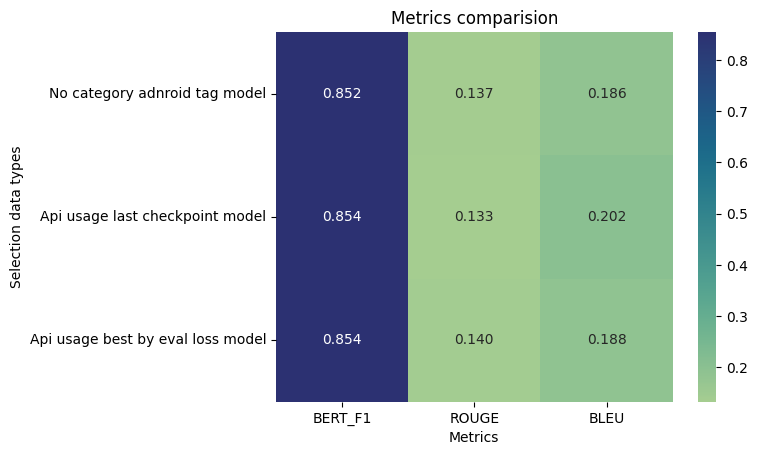

In [23]:
metrics_df = get_metric_table()
ax = sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap="crest")
ax.set(xlabel="Metrics", ylabel="Selection data types", title='Metrics comparision')
ax.plot()